In [1]:
# Acquiring/Loading the data -- Done -- pd.read_x
# Check the missing values   -- Done -- isna().sum()
# Univariate Analysis        -- Analysis of one column
# Bivariate Analysis
# Multivariate Analysis
# Cleaning data              -- Basic
# Handling Missing Data      --  
# Analyzing data
# Feature Engineering - Adding an addition column to structured data to increase the accuracy or improve elapsed time of a data process 
# Data Preparation
# Data Validation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #matplotlib.pyplot allow us to plot columns with missing values (NaN)
import seaborn as sns #With Seaborn you can't plot any column which have missing values (NaN)

C:\Users\ajitp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
house = pd.read_csv('house_pricing_train.csv')

In [4]:
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [108]:
house.Neighborhood

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
1455    Gilbert
1456     NWAmes
1457    Crawfor
1458      NAmes
1459    Edwards
Name: Neighborhood, Length: 1460, dtype: object

In [54]:
for col in house.columns:
    num_of_nan = house[col].isna().sum()
    if num_of_nan>0:
        print (col, '\t', num_of_nan)

LotFrontage 	 259
Alley 	 1369
MasVnrType 	 8
MasVnrArea 	 8
BsmtQual 	 37
BsmtCond 	 37
BsmtExposure 	 38
BsmtFinType1 	 37
BsmtFinType2 	 38
Electrical 	 1
FireplaceQu 	 690
GarageType 	 81
GarageYrBlt 	 81
GarageFinish 	 81
GarageQual 	 81
GarageCond 	 81
PoolQC 	 1453
Fence 	 1179
MiscFeature 	 1406


In [49]:
# Univaraite on String columns

In [48]:
house.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [47]:
house.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

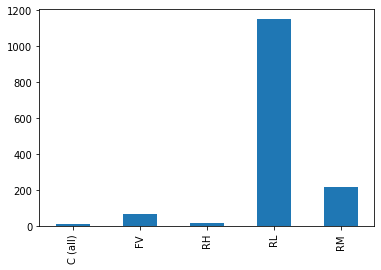

In [10]:
house.MSZoning.value_counts().sort_index().plot(kind='bar')

In [44]:
# Univariate on Numeric Columns

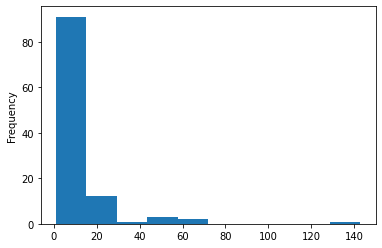

In [11]:
house.LotFrontage.value_counts().sort_index().plot(kind='hist')

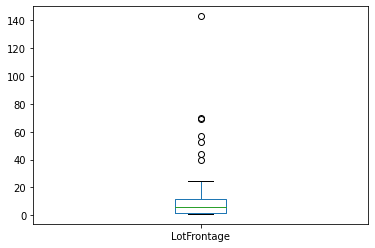

In [12]:
house.LotFrontage.value_counts().sort_index().plot(kind='box')

In [20]:
house.LotFrontage[house.LotFrontage>150]

197     174.0
231     174.0
934     313.0
1107    168.0
1127    182.0
1182    160.0
1211    152.0
1298    313.0
1337    153.0
Name: LotFrontage, dtype: float64

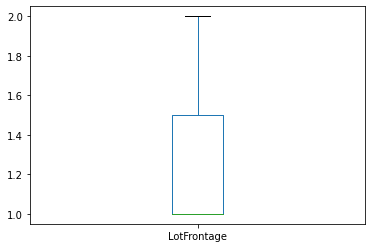

In [19]:
house.LotFrontage[house.LotFrontage>150].value_counts().sort_index().plot(kind='box')

In [16]:
max(house.LotFrontage[house.LotFrontage<130])

129.0

In [17]:
max(house.LotFrontage)

313.0

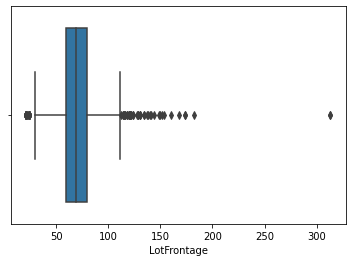

In [21]:
sns.boxplot(house.LotFrontage)

C:\Users\ajitp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ajitp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([205., 643., 298.,  40.,   9.,   4.,   0.,   0.,   0.,   2.]),
 array([ 21. ,  50.2,  79.4, 108.6, 137.8, 167. , 196.2, 225.4, 254.6,
        283.8, 313. ]),
 <a list of 10 Patch objects>)

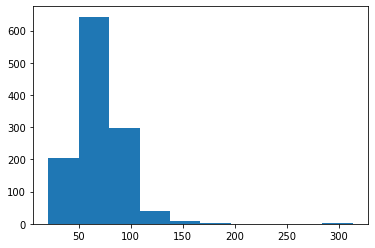

In [34]:
plt.hist(house.LotFrontage)

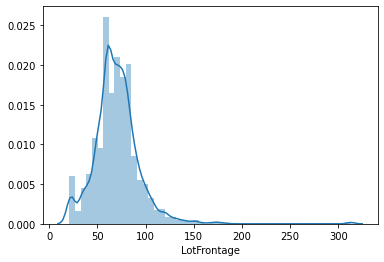

In [41]:
sns.distplot(house.LotFrontage.dropna())

In [43]:
# Five Number Summary
house.LotFrontage.min(), house.LotFrontage.max(), house.LotFrontage.mean(), house.LotFrontage.median(), house.LotFrontage.std()

(21.0, 313.0, 70.04995836802665, 69.0, 24.284751774483183)

In [55]:
# Bivariate Analysis (To find the relationship between two columns)

In [ ]:
# Between numeric columns

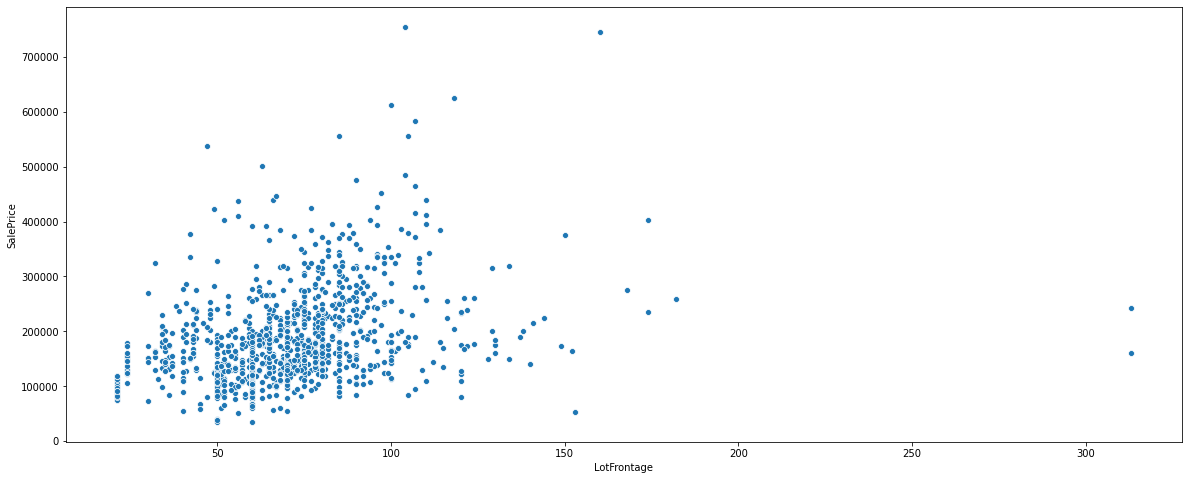

In [82]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=house.LotFrontage, y=house.SalePrice)

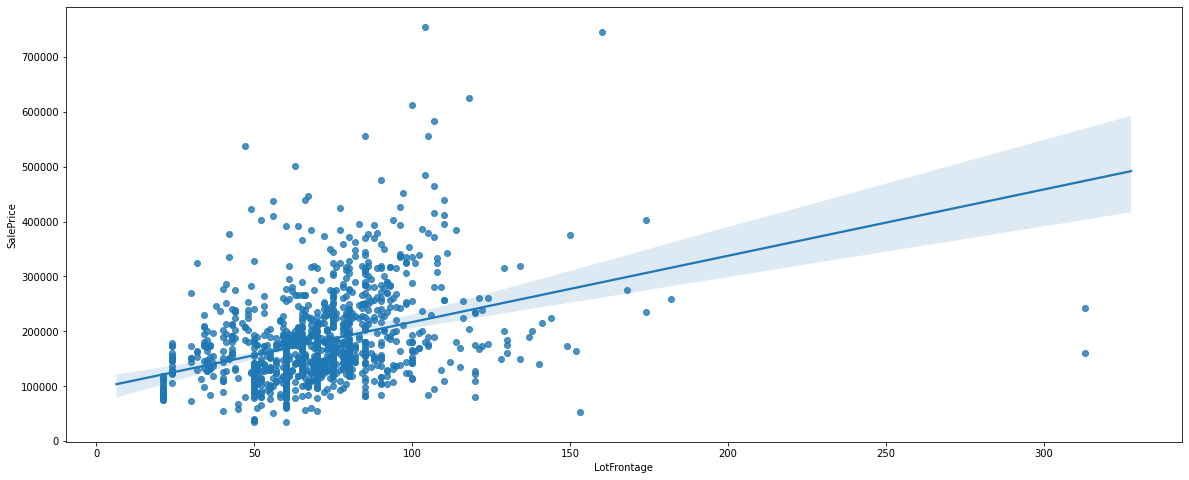

In [81]:
# Regression Plot
# y = a + bx
plt.figure(figsize=(20,8))
sns.regplot(x=house.LotFrontage, y=house.SalePrice)

In [61]:
?np.corrcoef

In [66]:
house.LotFrontage.corr(house.SalePrice)

0.35179909657067804

In [ ]:
# Correlation ranges between -1 and 1
# Anything close to zero, means weaker or no correlation, and anything close 1/-1 means stronger correlation
# If the value is positive, then its called positive correlation, eg. both variables with rise or fall
# If the value is negative, then its called negative correlation, eg. one value goes up, another goes down or vice versa

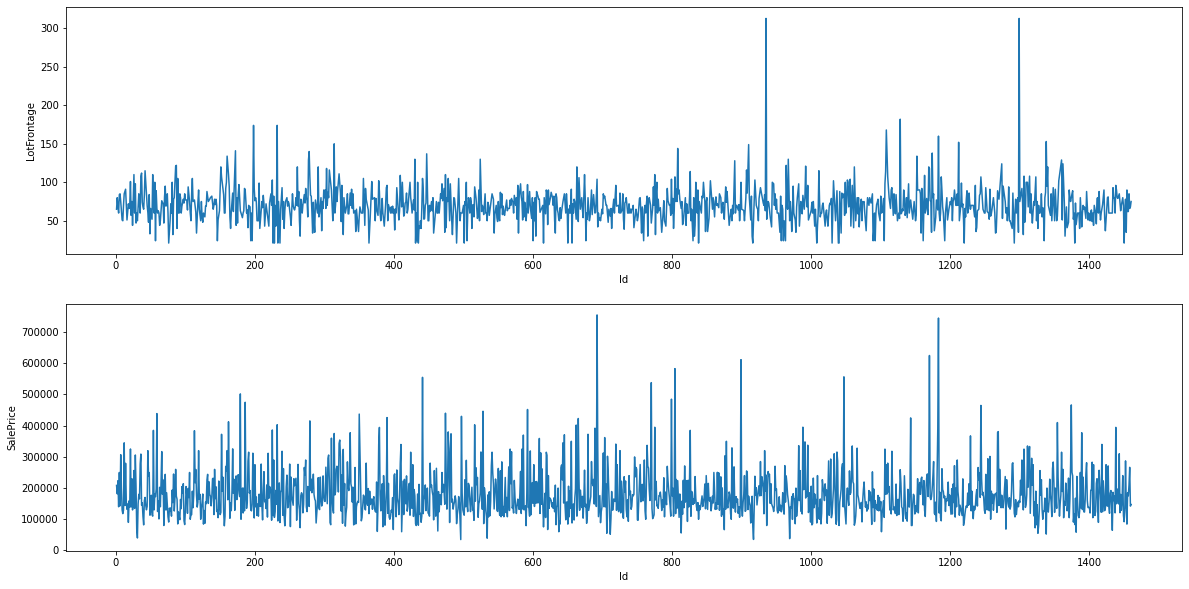

In [77]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.lineplot(x=house.Id, y=house.LotFrontage)
plt.subplot(2,1,2)
sns.lineplot(x=house.Id, y=house.SalePrice)

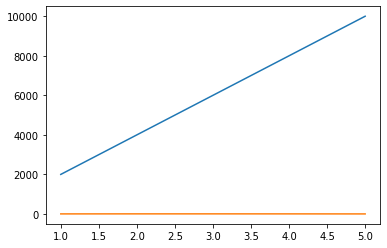

In [72]:

sns.lineplot(x=[1,2,3,4,5], y=[2000,4000,6000,8000,10000])
sns.lineplot(x=[1,2,3,4,5], y=[2,4,4,3,1])
#sns.lineplot(x=house.Id, y=house.SalePrice)

C:\Users\ajitp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ajitp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


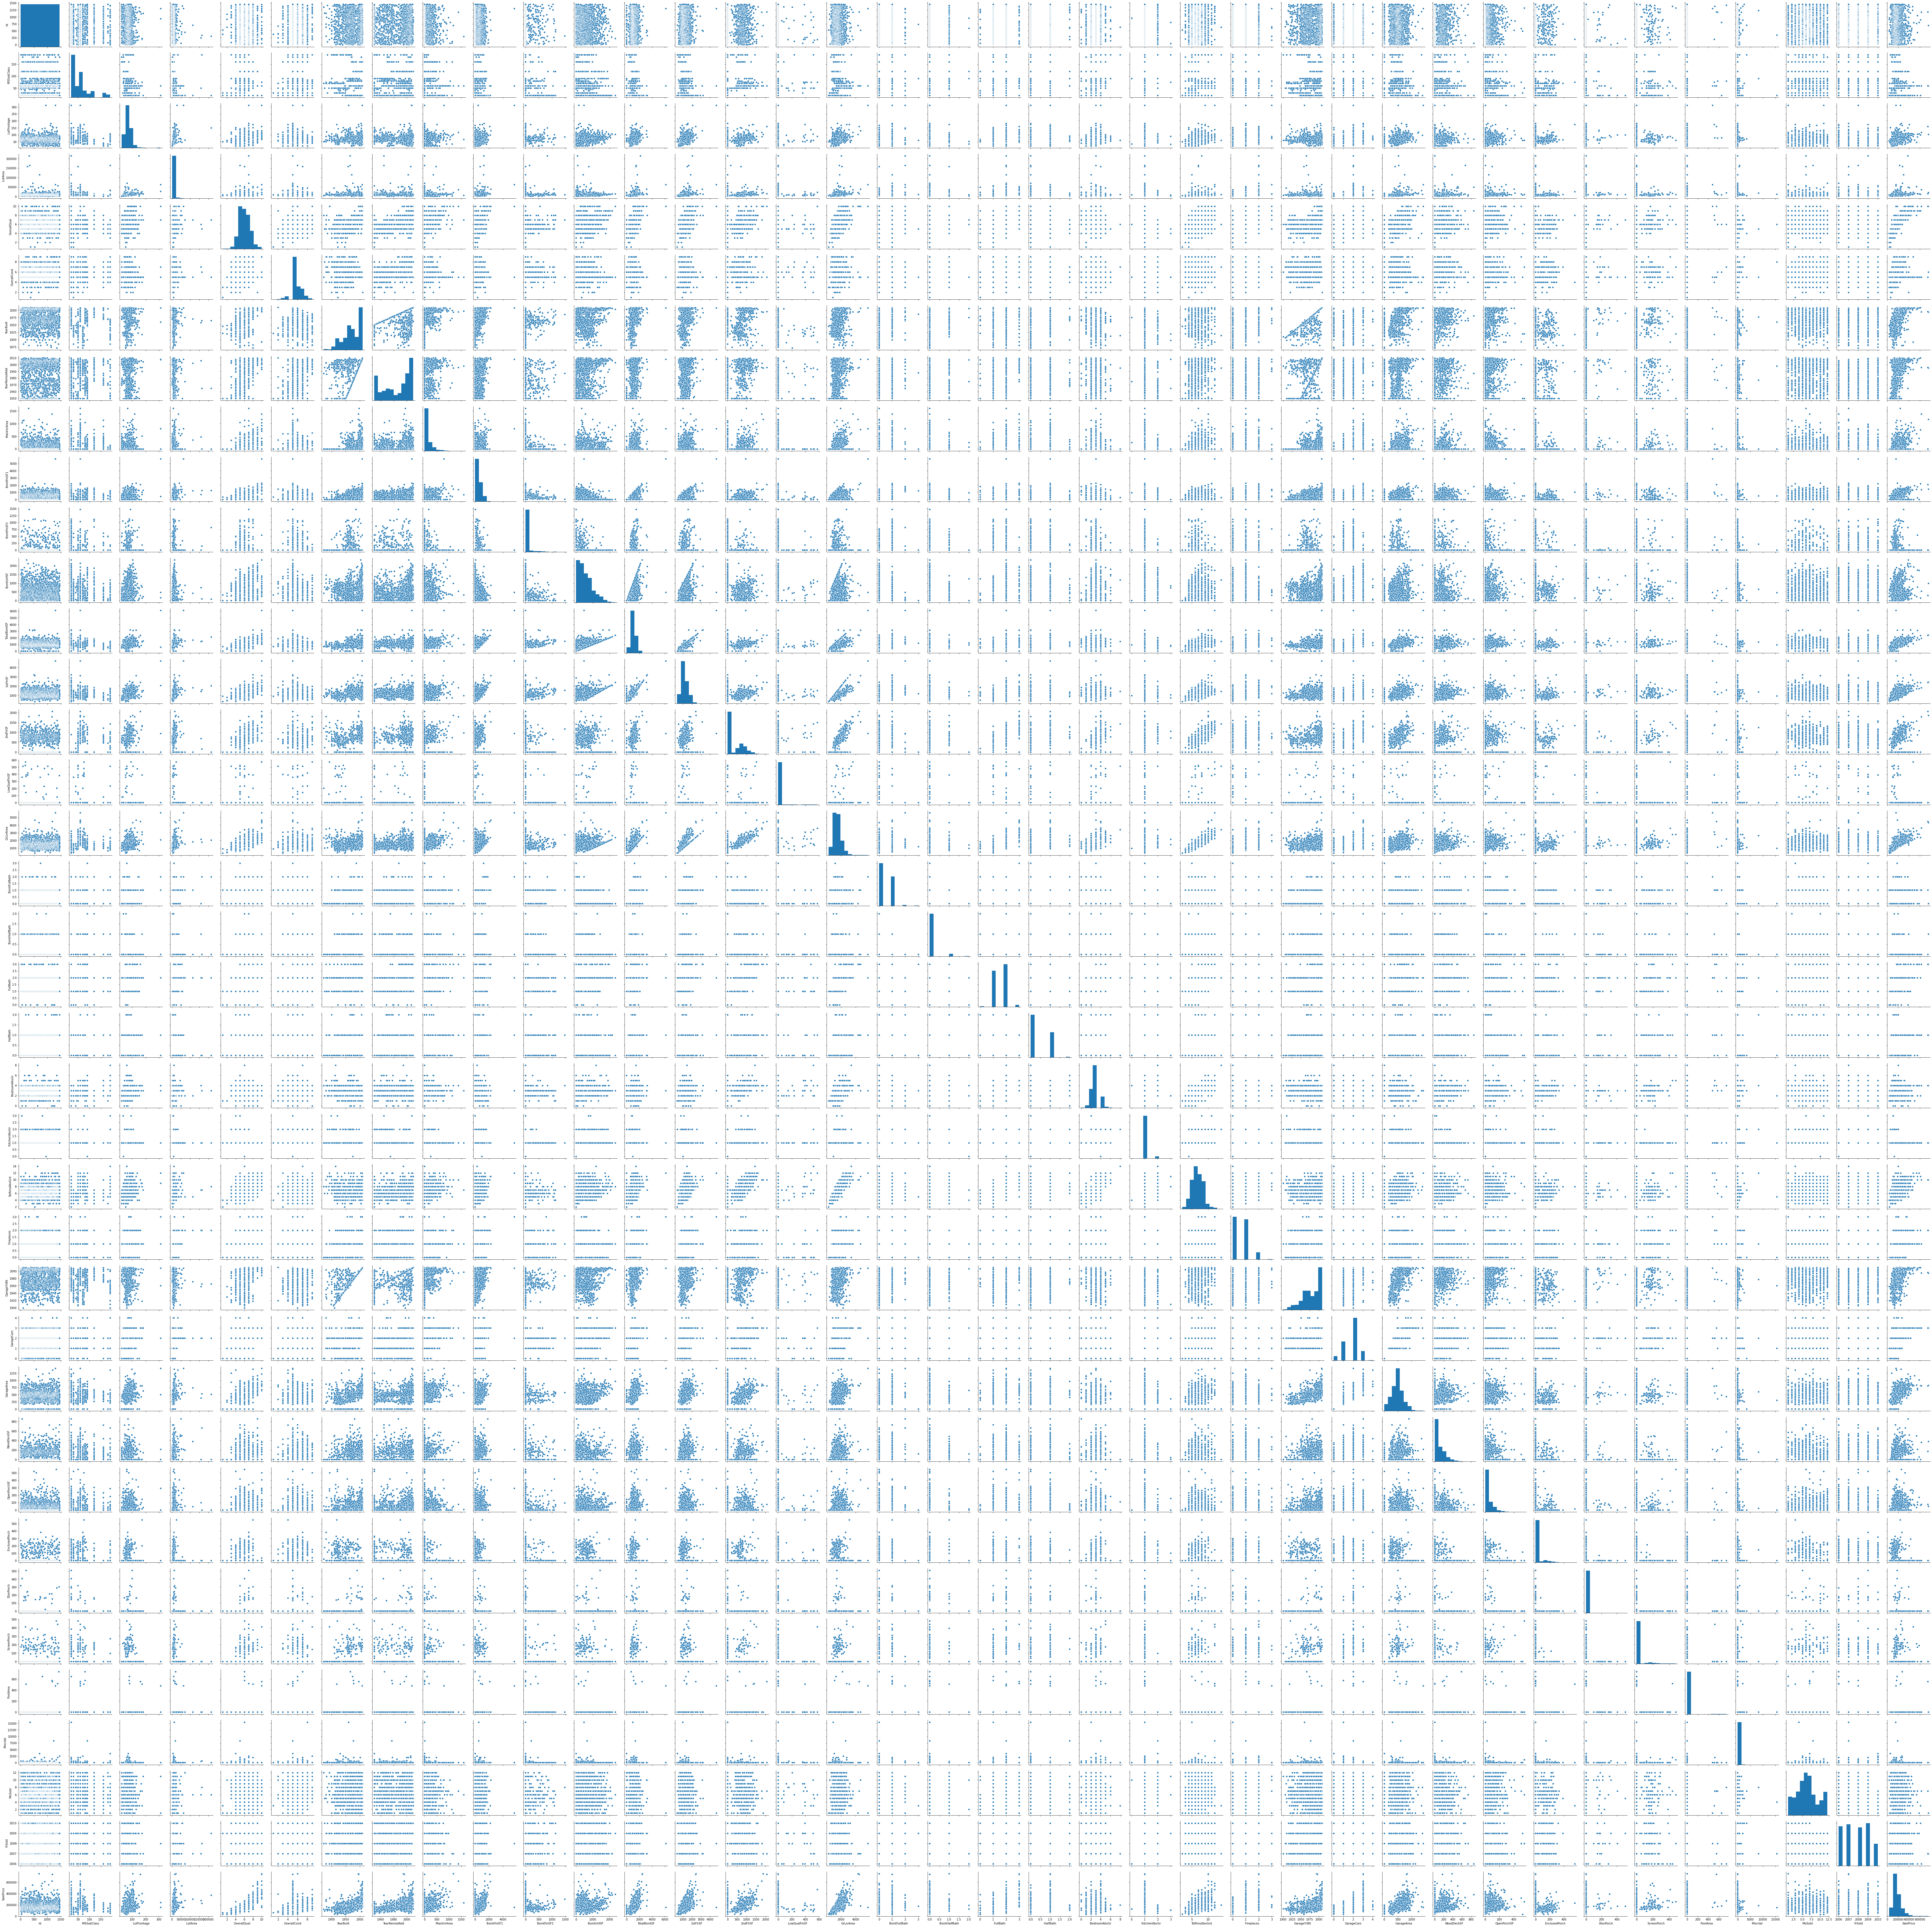

In [83]:
sns.pairplot(house)

In [84]:
# Bivariate analysis between one numeric column and another categorical column

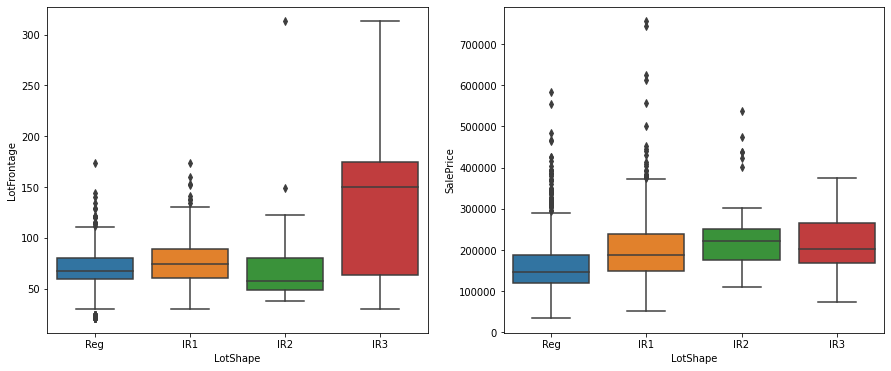

In [90]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(x=house.LotShape, y=house.LotFrontage)
plt.subplot(1,2,2)
sns.boxplot(x=house.LotShape, y=house.SalePrice)

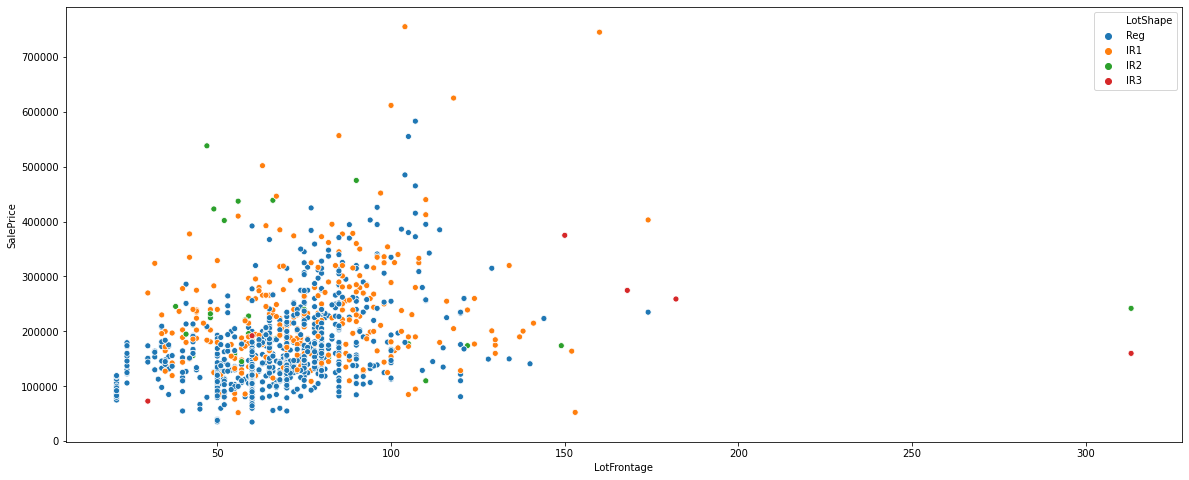

In [92]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=house.LotFrontage, y=house.SalePrice, hue=house.LotShape)

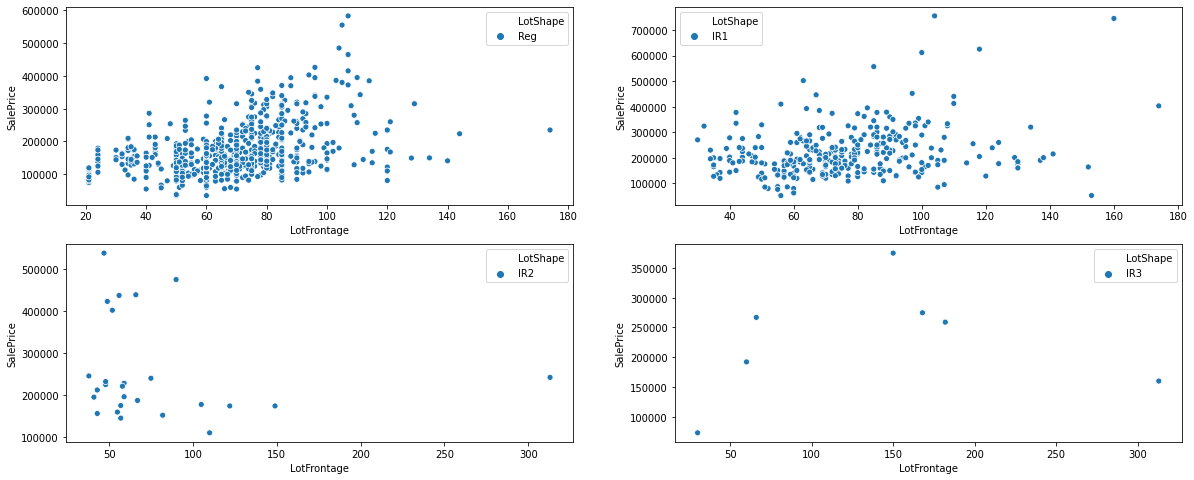

In [94]:
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
sns.scatterplot(x=house.LotFrontage, y=house.SalePrice, hue=house.LotShape[house.LotShape=='Reg'])
plt.subplot(2,2,2)
sns.scatterplot(x=house.LotFrontage, y=house.SalePrice, hue=house.LotShape[house.LotShape=='IR1'])
plt.subplot(2,2,3)
sns.scatterplot(x=house.LotFrontage, y=house.SalePrice, hue=house.LotShape[house.LotShape=='IR2'])
plt.subplot(2,2,4)
sns.scatterplot(x=house.LotFrontage, y=house.SalePrice, hue=house.LotShape[house.LotShape=='IR3'])

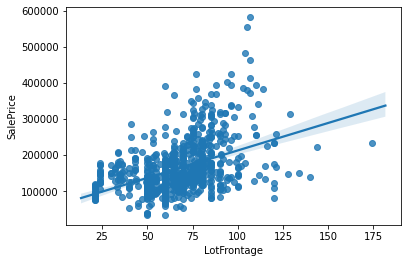

In [98]:
# Try to plot all LotShape categories in subplots 2x2
sns.regplot(x=house.LotFrontage[house.LotShape=='Reg'], y=house.SalePrice[house.LotShape=='Reg'])

In [99]:
# Average Sales Price by Year (Aggregation > Average/Mean)

In [100]:
avg_sales_price_by_year = house.groupby(['YrSold'])['SalePrice'].mean()

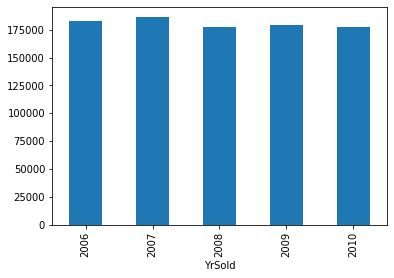

In [102]:
avg_sales_price_by_year.plot(kind='bar')

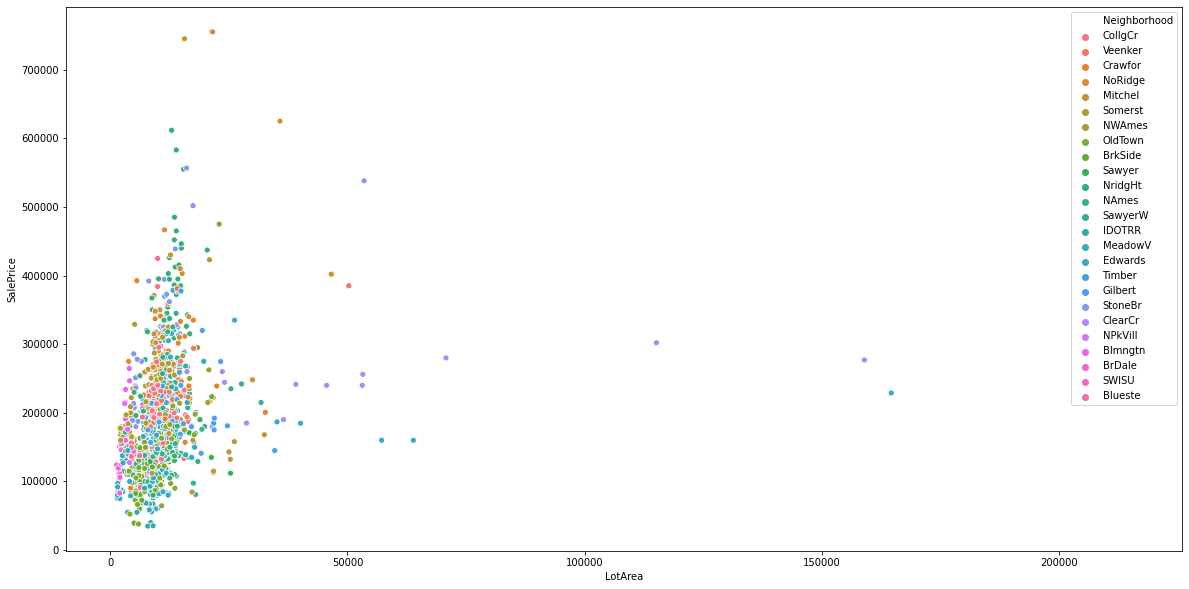

In [111]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=house.LotArea, y=house.SalePrice, hue=house.Neighborhood)

In [105]:
house.LotArea.corr(house.SalePrice)

0.26384335387140573

In [106]:
house.SalePrice.corr(house.LotArea)

0.26384335387140573

In [113]:
list = []
for nval in house.Neighborhood.unique():
    print(nval, house.SalePrice[house.Neighborhood==nval].corr(house.LotArea[house.Neighborhood==nval]))

CollgCr 0.377197543006024
Veenker 0.6972848140740955
Crawfor 0.20178437322605752
NoRidge 0.37822004243286206
Mitchel -0.059412508116548246
Somerst 0.7088924266504086
NWAmes 0.2580605780028936
OldTown 0.6159895867958586
BrkSide 0.6391097329763993
Sawyer 0.3222303950422686
NridgHt 0.7003362178588403
NAmes 0.477290756423722
SawyerW 0.5384322227729139
IDOTRR 0.13004429860142006
MeadowV 0.8605178479537839
Edwards 0.2393346161183647
Timber 0.22348159781496016
Gilbert 0.15725736098373233
StoneBr 0.7002918351271435
ClearCr 0.5731566905545596
NPkVill -0.7475191209105239
Blmngtn 0.37852871392042203
BrDale 0.36323588682166014
SWISU 0.40671148260307116
Blueste 0.9999999999999999
